Problem: What are the most important features that influence the success rate of the campaign?

In [1]:
# !pip install seaborn --upgrade
# !pip install plotly==5.4.0

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import warnings
import re
import os
from datetime import date

import plotly.express as px
sns.set()
pd.set_option("display.max_columns", None)
pd.set_option("display.width", None)
warnings.filterwarnings("ignore")

sns.__version__

'0.11.2'

In [3]:
# Matplotlib visualization
import matplotlib.pyplot as plt
%matplotlib inline

# Set default font size
plt.rcParams['font.size'] = 14

# Internal ipython tool for setting figure size
from IPython.core.pylabtools import figsize

# Seaborn for visualization
import seaborn as sns
sns.set(font_scale = 1.5)

# Splitting data into training and testing
from sklearn.model_selection import train_test_split

import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots

In [4]:
data = pd.read_excel('C:\\Users\\DKici\\Documents\\PricingPromo\\promo - Copy.xlsx', header=1) 

In [5]:
print('Number of records :',data.shape[0])
print('Number of features :',data.shape[1])

Number of records : 217
Number of features : 76


In [6]:
217-(217*0.75)

54.25

In [7]:
data.iloc[:2]

,Event,Start Date,End Date,Written,Written GM %,Written GM $,Traffic,SPG,Layer,Type,Impact,Percent,% Off Conditional,% Off Particular Item,% off 1 item,% off rest of purchase,Online,"% Off Reg Price Living, Dining, amd M. Bedroom",% Off Homestore Specials,% Off sofa w/ full price loveseat,% Off sectionals,Furniture %,Accessories %,Savings for $1499 or more,Savings for $2000 or more,Savings for $2499 or more,Finance Offer,Additional % When Financing,Additional % With Rest Test,Additional % Off JUV,Additional % Off OTB,Additional % Off CLA,% off in MB,% off in AB,% off in GTA,% Off at 090,Wrap,Flash,Mattress Deal,Doorcrashers,Item and Price (I&P),x GST Savings,x Tax Savings,Option 1 %,Option 1,Option 2 %,Option 2 Financing,No Flyer Items,No Promo Items,FInance Offer,GM Budget,GM Forecast,Actual,GM Budget.1,GM Forecast.1,Actual.1,Written.1,SPG X,GMPG $,GM%,GMFF%,Written.2,SPG.1,GMPG $.1,GM%.1,GMFF%.1,Written.3,SPG.2,GMPG $.2,GM%.2,GMFF%.2,Traffic % Var. to Budget,REAC,REAC GM Impact (% pts),CPM BOS,Unnamed: 75
0,Anniversary Sale,2019-03-01,2019-03-03,2279978,1.206,931654,9231,741,BMSM 15%/20% for $1499 or more/25% for $2499 o...,BMSM- buy more save more,NaN,0.15,0.25,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.2,NaN,0.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,235.115001,110.768045,0.471123,NaN,NaN,200.804581,89.601884,0.446214,NaN,NaN,NaN,-21.166161,-0.024908,NaN,-0.023096,NaN,NaN,NaN,NaN
1,Anniversary Sale,2019-03-04,2019-03-07,1823481,1.554,707305,6437,1130,0.15,%,NaN,0.15,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,251.667719,118.572643,0.471148,NaN,NaN,174.104018,79.348816,0.455755,NaN,NaN,NaN,-39.223828,-0.015392,NaN,-0.068760,NaN,NaN,NaN,NaN


GM%, only 40 non-null values!
SPG vs. SPG X?
Traffic?

In [8]:
data["length of the event"] = (data["End Date"] - data["Start Date"]).dt.days +1
data["length of the event"] 

0      3
1      4
2      3
3      4
4      1
      ..
212    3
213    5
214    9
215    4
216    4
Name: length of the event, Length: 217, dtype: int64

In [9]:
data["length of the event"] .max(), data["length of the event"] .min()

(27, 1)

In [10]:
# data.describe()

# Exploratory Data Analysis

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 77 columns):
 #   Column                                          Non-Null Count  Dtype         
---  ------                                          --------------  -----         
 0   Event                                           217 non-null    object        
 1   Start Date                                      217 non-null    datetime64[ns]
 2   End Date                                        217 non-null    datetime64[ns]
 3   Written                                         217 non-null    int64         
 4   Written GM %                                    217 non-null    float64       
 5   Written GM $                                    217 non-null    int64         
 6   Traffic                                         217 non-null    int64         
 7   SPG                                             217 non-null    int64         
 8   Layer                                           21

## 1) Null values

In [12]:
pd.DataFrame(data.isnull().sum(), columns=['#Null values']).T

,Event,Start Date,End Date,Written,Written GM %,Written GM $,Traffic,SPG,Layer,Type,Impact,Percent,% Off Conditional,% Off Particular Item,% off 1 item,% off rest of purchase,Online,"% Off Reg Price Living, Dining, amd M. Bedroom",% Off Homestore Specials,% Off sofa w/ full price loveseat,% Off sectionals,Furniture %,Accessories %,Savings for $1499 or more,Savings for $2000 or more,Savings for $2499 or more,Finance Offer,Additional % When Financing,Additional % With Rest Test,Additional % Off JUV,Additional % Off OTB,Additional % Off CLA,% off in MB,% off in AB,% off in GTA,% Off at 090,Wrap,Flash,Mattress Deal,Doorcrashers,Item and Price (I&P),x GST Savings,x Tax Savings,Option 1 %,Option 1,Option 2 %,Option 2 Financing,No Flyer Items,No Promo Items,FInance Offer,GM Budget,GM Forecast,Actual,GM Budget.1,GM Forecast.1,Actual.1,Written.1,SPG X,GMPG $,GM%,GMFF%,Written.2,SPG.1,GMPG $.1,GM%.1,GMFF%.1,Written.3,SPG.2,GMPG $.2,GM%.2,GMFF%.2,Traffic % Var. to Budget,REAC,REAC GM Impact (% pts),CPM BOS,Unnamed: 75,length of the event
#Null values,0,0,0,0,0,0,0,0,0,13,207,33,0,0,205,205,216,215,215,211,213,216,216,215,216,209,215,214,215,216,216,215,216,216,216,216,216,210,213,214,198,216,216,215,215,215,215,213,213,217,40,44,60,131,133,136,40,0,0,177,135,60,20,20,177,155,40,60,20,177,140,3,60,60,71,216,0


In [13]:
# take a look to see how is the situation of missing data:
missing_data = pd.DataFrame({'total_missing': data.isnull().sum(), 'perc_missing': (data.isnull().sum()/len(data))*100}).round(2)

# Print some summary information
print ("Our dataframe has " + str(data.shape[1]) + " column(s).\n"
        "There is/are " + str(len(missing_data.loc[missing_data['total_missing'] > 0])) +
              " column(s) that has/have missing values.")
missing_data

Our dataframe has 77 column(s).
There is/are 63 column(s) that has/have missing values.


,total_missing,perc_missing
Event,0,0.00
Start Date,0,0.00
End Date,0,0.00
Written,0,0.00
Written GM %,0,0.00
...,...,...
REAC,60,27.65
REAC GM Impact (% pts),60,27.65
CPM BOS,71,32.72
Unnamed: 75,216,99.54


In [14]:
data.columns[data.isnull().sum().T>(0.75*len(data))]

Index(['Impact', '% off 1 item', '% off rest of purchase', 'Online',
       '% Off Reg Price Living, Dining, amd M. Bedroom',
       '% Off Homestore Specials', '% Off sofa w/ full price loveseat',
       '% Off sectionals', 'Furniture %', 'Accessories %',
       'Savings for $1499 or more', 'Savings for $2000 or more',
       'Savings for $2499 or more', 'Finance Offer',
       'Additional % When Financing', 'Additional % With Rest Test',
       'Additional % Off JUV', 'Additional % Off OTB', 'Additional % Off CLA',
       '% off in MB', '% off in AB', '% off in GTA', '% Off at 090', 'Wrap',
       'Flash', 'Mattress Deal', 'Doorcrashers', 'Item and Price (I&P)',
       'x GST Savings', 'x Tax Savings', 'Option 1 %', 'Option 1',
       'Option 2 %', 'Option 2 Financing', 'No Flyer Items', 'No Promo Items',
       'FInance Offer', 'GM%', 'GM%.1', 'GM%.2', 'Unnamed: 75'],
      dtype='object')

In [15]:
col_to_drop = data.columns[data.isnull().sum().T>(0.75*len(data))]
len(col_to_drop)

41

In [16]:
col_to_drop

Index(['Impact', '% off 1 item', '% off rest of purchase', 'Online',
       '% Off Reg Price Living, Dining, amd M. Bedroom',
       '% Off Homestore Specials', '% Off sofa w/ full price loveseat',
       '% Off sectionals', 'Furniture %', 'Accessories %',
       'Savings for $1499 or more', 'Savings for $2000 or more',
       'Savings for $2499 or more', 'Finance Offer',
       'Additional % When Financing', 'Additional % With Rest Test',
       'Additional % Off JUV', 'Additional % Off OTB', 'Additional % Off CLA',
       '% off in MB', '% off in AB', '% off in GTA', '% Off at 090', 'Wrap',
       'Flash', 'Mattress Deal', 'Doorcrashers', 'Item and Price (I&P)',
       'x GST Savings', 'x Tax Savings', 'Option 1 %', 'Option 1',
       'Option 2 %', 'Option 2 Financing', 'No Flyer Items', 'No Promo Items',
       'FInance Offer', 'GM%', 'GM%.1', 'GM%.2', 'Unnamed: 75'],
      dtype='object')

41 of the features has more than 75% missing values, then we have only 31 variables with enough instances

In [17]:
data = data.drop(columns = col_to_drop)

In [18]:
data.shape

(217, 36)

Event, Type, and Layer are important for us. 

In [19]:
data.Event.isnull().sum()

0

Can we name these Nan events in one category? # I implemented event names in promo - Copy.xlsx
Can we merge some of them e.g. 62,63,64,65 OR 68, 69 - is that possible to aggregrate some variables such as SPG, GM etc. on avg or sum? what would be meaningful?

In [20]:
data.Type.isnull().sum()

13

Any chance to figure out Type of the events based on event name and layer?

In [21]:
category = data.select_dtypes(include='object')
numeric = data.select_dtypes(exclude='object')

In [22]:
for f in category.columns:
    print(category[f].value_counts())
    print('***********************************')

Anniversary Sale                                                                        27
Spring Sale & Clearance                                                                  8
Labour Day Sale                                                                          7
New Now Wow                                                                              7
Hello Summer                                                                             7
                                                                                        ..
Summer Seating & Sleep                                                                   1
Black Friday\n*Doorcrashers starts Wk2\n*Separate item selections for wks 1 &2 (Wk2)     1
Truckload Sale  (Wk 2)                                                                   1
No Flyers\nFlash Items Only                                                              1
VIP Weekend                                                                              1

In [23]:
category.head()

,Event,Layer,Type,GM Forecast,GM Forecast.1
0,Anniversary Sale,BMSM 15%/20% for $1499 or more/25% for $2499 o...,BMSM- buy more save more,NaN,NaN
1,Anniversary Sale,0.15,%,NaN,NaN
2,Anniversary Sale,40% off 1 items /20% off the rest of your purc...,First Item,NaN,NaN
3,Anniversary Sale,0.2,%,NaN,NaN
4,Anniversary Sale,0.25,%,NaN,NaN


In [24]:
numeric.head()

,Start Date,End Date,Written,Written GM %,Written GM $,Traffic,SPG,Percent,% Off Conditional,% Off Particular Item,GM Budget,Actual,GM Budget.1,Actual.1,Written.1,SPG X,GMPG $,GMFF%,Written.2,SPG.1,GMPG $.1,GMFF%.1,Written.3,SPG.2,GMPG $.2,GMFF%.2,Traffic % Var. to Budget,REAC,REAC GM Impact (% pts),CPM BOS,length of the event
0,2019-03-01,2019-03-03,2279978,1.206,931654,9231,741,0.15,0.25,0.0,NaN,NaN,NaN,NaN,NaN,235.115001,110.768045,NaN,NaN,200.804581,89.601884,NaN,NaN,NaN,-21.166161,NaN,-0.023096,NaN,NaN,NaN,3
1,2019-03-04,2019-03-07,1823481,1.554,707305,6437,1130,0.15,0.00,0.0,NaN,NaN,NaN,NaN,NaN,251.667719,118.572643,NaN,NaN,174.104018,79.348816,NaN,NaN,NaN,-39.223828,NaN,-0.068760,NaN,NaN,NaN,4
2,2019-03-08,2019-03-10,3229375,1.304,1411531,10074,1013,NaN,0.40,0.0,NaN,NaN,NaN,NaN,NaN,258.539548,121.831697,NaN,NaN,255.807800,118.627601,NaN,NaN,NaN,-3.204096,NaN,-0.184133,NaN,NaN,NaN,3
3,2019-03-11,2019-03-14,1933073,1.513,732201,7844,982,0.20,0.00,0.0,NaN,NaN,NaN,NaN,NaN,221.536194,104.513610,NaN,NaN,144.528281,67.936047,NaN,NaN,NaN,-36.577562,NaN,-0.130235,NaN,NaN,NaN,4
4,2019-03-15,2019-03-15,1257243,0.422,530576,2653,474,0.25,0.00,0.0,NaN,NaN,NaN,NaN,NaN,399.776550,188.719038,NaN,NaN,420.846209,199.700682,NaN,NaN,NaN,10.981644,NaN,-0.148632,NaN,NaN,NaN,1


### Inspecting each value counts in categorical columns:

In [25]:
pd.DataFrame(category.isnull().sum(), columns=['#Null values']).T
#Event, Layer, Type, and GM Forecast has less than 100 nulls

,Event,Layer,Type,GM Forecast,GM Forecast.1
#Null values,0,0,13,44,133


In [26]:
category["GM Forecast"] #we probably don;t need this variable. Then no need to make any data transformation

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
       ...  
212    0.511
213    0.501
214    0.499
215    0.495
216    0.495
Name: GM Forecast, Length: 217, dtype: object

In [27]:
possible_labels = category["Event"].unique()

label_dict = {}
for index, possible_label in enumerate(possible_labels):
    label_dict[possible_label] = index
print(label_dict)

{'Anniversary Sale': 0, 'Spring Sale & Clearance': 1, 'New Now Wow': 2, 'Spring Home Event': 3, 'Truckload Sale': 4, 'Long Weekend Sale': 5, 'Hello Summer': 6, 'Boxing Day HO': 7, 'NY Event': 8, 'Super Savings': 9, 'Family Spaces': 10, 'The Big Sleep': 11, 'Best of the Best': 12, 'No Flyers\nFlash Items Only': 13, 'Truckload Sale (Wk 1)': 14, 'Truckload Sale  (Wk 2)': 15, 'Shop the Drop (Wk 1)': 16, 'Shop the Drop (Employee Sale)': 17, 'Shop the Drop (Wk 2)': 18, 'VIP': 19, 'Summer Seating & Sleep': 20, 'Canada Day\nWeek 1': 21, 'Canada Day': 22, 'Bigger Better Value': 23, 'Friends and Family Event\nVIP': 24, 'Summer Closeout': 25, 'VIP Event\n+ Hamilton GO': 26, 'Stylish Steals': 27, 'Prospect Event': 28, 'Labour Day Sale': 29, 'Fall Home Sale\nWeek 1': 30, 'VIP Weekend': 31, 'Fall Home Sale\nWeek 2': 32, 'Fall Home Sale\nWeek 3': 33, 'Fall Home Sale\nWeek 4': 34, 'High Impact': 35, 'Red Tag Sale\nWeek 1': 36, 'Red Tag Sale Week 1\n(Thanksgiving)': 37, 'Red Tag Sale \nWeek 2': 38, 'Re

- in the original data file, 183 records belongs to 73 different events, 34 of them are unnamed
- in promo-Copy 73 different events

<AxesSubplot:>

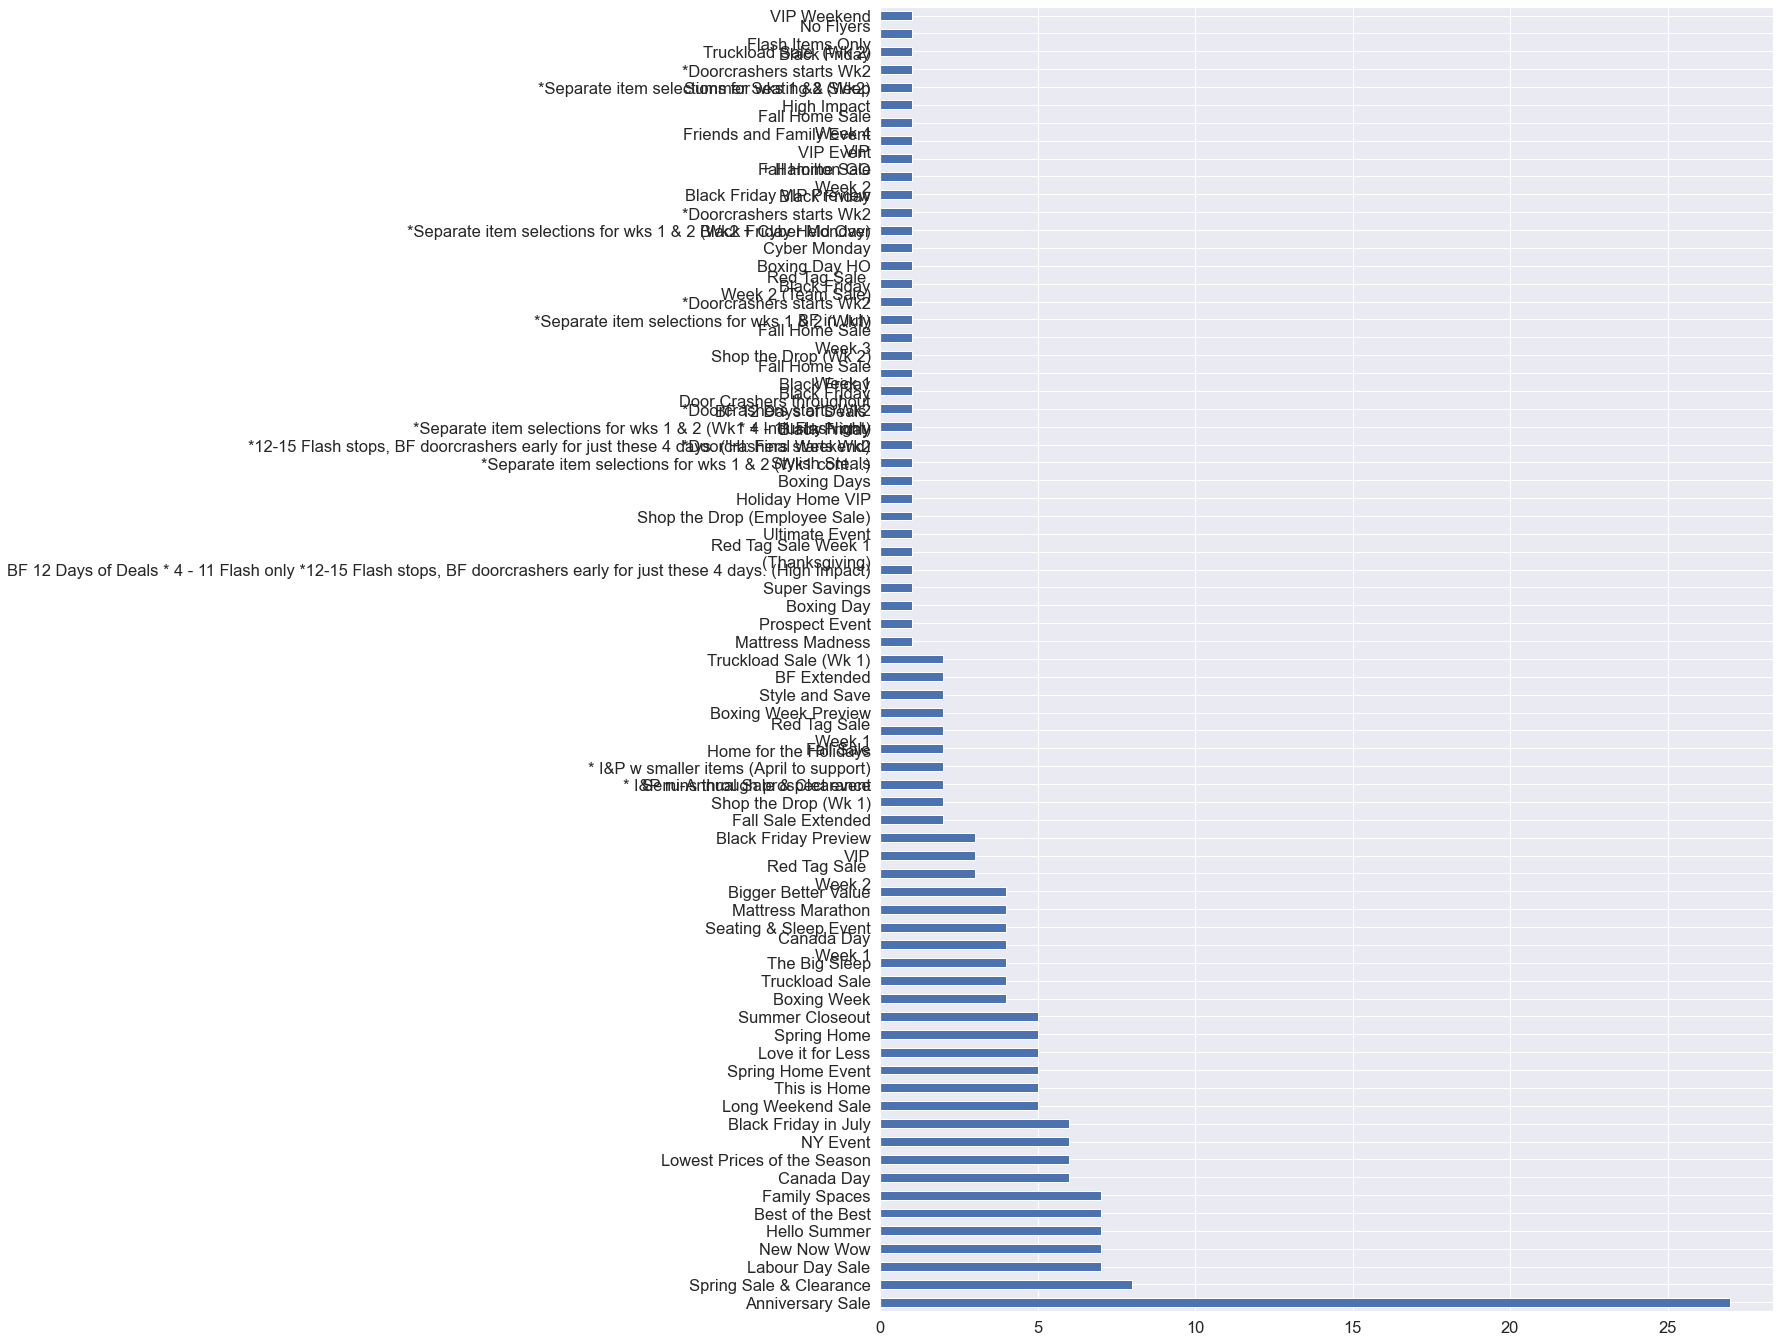

In [28]:
category['Event'].value_counts()[:].plot(kind='barh',figsize=(16,24))

<AxesSubplot:>

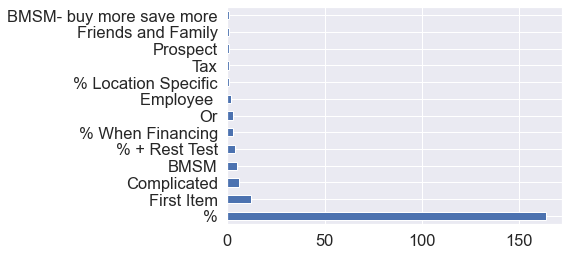

In [29]:
category['Type'].value_counts()[:].plot(kind='barh') 

In [96]:
category['Type'] = category['Type'].fillna("unknown")
data['Type'] = data['Type'].fillna("unknown")
category[category["Type"] == "unknown"]

,Event,Layer,Type
16,New Now Wow,?,unknown
19,New Now Wow,?,unknown
21,New Now Wow,?,unknown
22,Spring Home Event,?,unknown
33,Hello Summer,?,unknown
38,Hello Summer,?,unknown
45,Super Savings,50 / 50 / 50 w 20% layer,unknown
84,Canada Day\nWeek 1,PE HO\n30.0%,unknown
166,Long Weekend Sale,High Impact\n30%\n+ $500 off $2500+,unknown
171,Best of the Best,25%\n+ 50 off sofa w full-price love\n+ 30% of...,unknown


<AxesSubplot:xlabel='Event', ylabel='length of the event'>

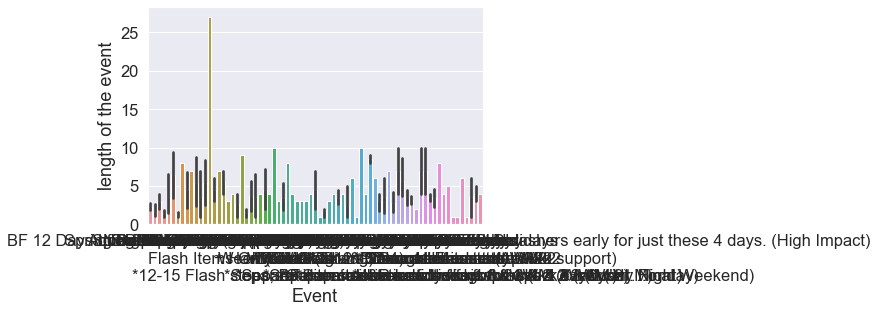

In [31]:
sns.barplot(data = data, x = 'Event', y ='length of the event')

In [32]:
# Group by date_served and count number of unique user_id's
by_type = data.groupby(["Type"])['SPG'].sum()

# Print head of daily_users
print(by_type.head())

Type
%                      293405
% + Rest Test            2110
% Location Specific       951
% When Financing         1444
BMSM                     6098
Name: SPG, dtype: int64


<AxesSubplot:xlabel='Type'>

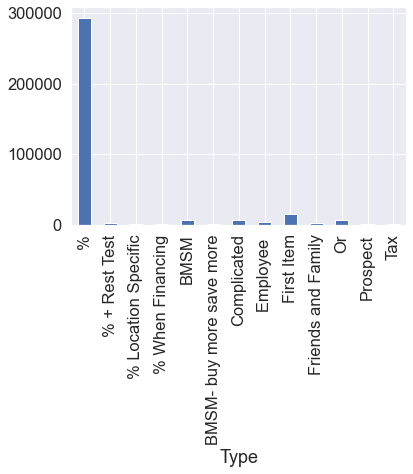

In [33]:
by_type.plot(kind='bar')

In [34]:
pd.DataFrame(category.isnull().sum(), columns=['#Null values']).T

,Event,Layer,Type,GM Forecast,GM Forecast.1
#Null values,0,0,0,44,133


In [63]:
category = category[["Event", "Layer", "Type"]]
category

,Event,Layer,Type
0,Anniversary Sale,BMSM 15%/20% for $1499 or more/25% for $2499 o...,BMSM- buy more save more
1,Anniversary Sale,0.15,%
2,Anniversary Sale,40% off 1 items /20% off the rest of your purc...,First Item
3,Anniversary Sale,0.2,%
4,Anniversary Sale,0.25,%
...,...,...,...
212,Home for the Holidays\n* I&P w smaller items (...,25% + I&P,%
213,Home for the Holidays\n* I&P w smaller items (...,30% + I&P,%
214,Boxing Week Preview,25% + I&P,%
215,Boxing Day,30% + I&P,%


### Inspecting each value counts in numeric columns:

Null values over 200
Impact, % off 1 item	% off rest of purchase	Online	% Off Reg Price Living, Dining, amd M. Bedroom	% Off Homestore Specials	% Off sofa w/ full price loveseat	% Off sectionals	Furniture %	Accessories %	Savings for $1499 or more	Savings for $2000 or more	Savings for $2499 or more	Finance Offer	Additional % When Financing	Additional % With Rest Test	Additional % Off JUV	Additional % Off OTB	Additional % Off CLA	% off in MB	% off in AB	% off in GTA	% Off at 090	Wrap	Flash	Mattress Deal	Doorcrashers	Item and Price (I&P)	x GST Savings	x Tax Savings	Option 1 %	Option 1	Option 2 %	Option 2 Financing	No Flyer Items	No Promo Items	FInance Offer

In [36]:
numeric_null_counts=pd.DataFrame(numeric.isnull().sum(), columns=['#Null values']).T
numeric_null_counts

,Start Date,End Date,Written,Written GM %,Written GM $,Traffic,SPG,Percent,% Off Conditional,% Off Particular Item,GM Budget,Actual,GM Budget.1,Actual.1,Written.1,SPG X,GMPG $,GMFF%,Written.2,SPG.1,GMPG $.1,GMFF%.1,Written.3,SPG.2,GMPG $.2,GMFF%.2,Traffic % Var. to Budget,REAC,REAC GM Impact (% pts),CPM BOS,length of the event
#Null values,0,0,0,0,0,0,0,33,0,0,40,60,131,136,40,0,0,135,60,20,20,155,40,60,20,140,3,60,60,71,0


In [95]:
numeric["Percent"] = numeric["Percent"].fillna(0)
data["Percent"] = data["Percent"].fillna(0)
numeric["Percent"]

0      0.15
1      0.15
2      0.00
3      0.20
4      0.25
       ... 
212    0.25
213    0.30
214    0.25
215    0.30
216    0.30
Name: Percent, Length: 217, dtype: float64

If Percent is null, does it men 0% or unknown or Non Applicable? if it is unknow, is that ok to impute data (mean, median)?

In [38]:
numeric_col= numeric.columns[numeric.isnull().sum().T<(0.75*len(numeric))
                            ]
numeric_df = numeric[numeric_col]
numeric_df.head()

,Start Date,End Date,Written,Written GM %,Written GM $,Traffic,SPG,Percent,% Off Conditional,% Off Particular Item,GM Budget,Actual,GM Budget.1,Actual.1,Written.1,SPG X,GMPG $,GMFF%,Written.2,SPG.1,GMPG $.1,GMFF%.1,Written.3,SPG.2,GMPG $.2,GMFF%.2,Traffic % Var. to Budget,REAC,REAC GM Impact (% pts),CPM BOS,length of the event
0,2019-03-01,2019-03-03,2279978,1.206,931654,9231,741,0.15,0.25,0.0,NaN,NaN,NaN,NaN,NaN,235.115001,110.768045,NaN,NaN,200.804581,89.601884,NaN,NaN,NaN,-21.166161,NaN,-0.023096,NaN,NaN,NaN,3
1,2019-03-04,2019-03-07,1823481,1.554,707305,6437,1130,0.15,0.00,0.0,NaN,NaN,NaN,NaN,NaN,251.667719,118.572643,NaN,NaN,174.104018,79.348816,NaN,NaN,NaN,-39.223828,NaN,-0.068760,NaN,NaN,NaN,4
2,2019-03-08,2019-03-10,3229375,1.304,1411531,10074,1013,0.00,0.40,0.0,NaN,NaN,NaN,NaN,NaN,258.539548,121.831697,NaN,NaN,255.807800,118.627601,NaN,NaN,NaN,-3.204096,NaN,-0.184133,NaN,NaN,NaN,3
3,2019-03-11,2019-03-14,1933073,1.513,732201,7844,982,0.20,0.00,0.0,NaN,NaN,NaN,NaN,NaN,221.536194,104.513610,NaN,NaN,144.528281,67.936047,NaN,NaN,NaN,-36.577562,NaN,-0.130235,NaN,NaN,NaN,4
4,2019-03-15,2019-03-15,1257243,0.422,530576,2653,474,0.25,0.00,0.0,NaN,NaN,NaN,NaN,NaN,399.776550,188.719038,NaN,NaN,420.846209,199.700682,NaN,NaN,NaN,10.981644,NaN,-0.148632,NaN,NaN,NaN,1


In [39]:
df = numeric_df.describe()

def custom_style(row):
    
    color = 'white'
    if row.name == 'min' or row.name == 'max':
        color = 'darkkhaki'

    return ['background-color: %s' % color]*len(row.values)

df.style.apply(custom_style, axis=1)

,Written,Written GM %,Written GM $,Traffic,SPG,Percent,% Off Conditional,% Off Particular Item,GM Budget,Actual,GM Budget.1,Actual.1,Written.1,SPG X,GMPG $,GMFF%,Written.2,SPG.1,GMPG $.1,GMFF%.1,Written.3,SPG.2,GMPG $.2,GMFF%.2,Traffic % Var. to Budget,REAC,REAC GM Impact (% pts),CPM BOS,length of the event
count,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,177.000000,157.000000,86.000000,81.000000,177.000000,217.000000,217.000000,82.000000,157.000000,197.000000,197.000000,62.000000,177.000000,157.000000,197.000000,77.000000,214.000000,157.000000,157.000000,146.000000,217.000000
mean,3156459.377880,1.563968,1367850.327189,8173.419355,1656.755760,0.216129,0.051152,0.029493,0.458069,0.469337,0.458414,0.437883,2294958.065978,252.154548,115.871324,0.397814,2104445.009837,325.632999,152.930071,0.459328,-0.116536,70.112150,25.295161,-0.053797,1793.660883,0.119728,0.007544,0.101553,3.792627
std,2541132.596959,1.291143,1136086.526710,6619.123071,2542.476048,0.101460,0.153089,0.129569,0.006611,0.023859,0.007038,0.126340,1767301.899501,105.707122,48.023070,0.104087,1612674.952411,161.881848,74.986911,0.016760,0.542403,155.205010,70.293170,0.183495,4520.587770,0.085994,0.034191,0.068372,3.123735
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.424000,0.372205,0.439000,0.000000,168828.836800,0.000000,0.000000,0.000000,89844.170000,97.157819,36.162643,0.405621,-1.000000,-329.803312,-152.138311,-0.432000,-0.964614,-0.107282,-0.032740,-0.016361,1.000000
25%,1221798.000000,0.492000,487219.000000,2813.000000,578.000000,0.200000,0.000000,0.000000,0.457000,0.456456,0.456000,0.456456,839304.172500,216.664523,100.716651,0.420000,754813.870000,201.148158,92.030335,0.451244,-0.351956,-22.165029,-18.899113,0.002679,-0.161796,0.060636,-0.006597,0.054056,2.000000
50%,2494945.000000,1.276000,1053718.000000,6537.000000,1065.000000,0.250000,0.000000,0.000000,0.458242,0.471042,0.457000,0.471723,1913285.128500,251.667719,116.467854,0.425500,1689730.780000,278.000000,134.731301,0.463460,-0.075031,23.657416,6.416580,0.027591,0.006964,0.102292,-0.003614,0.101337,3.000000
75%,4998579.000000,1.904000,2163600.000000,12274.000000,1843.000000,0.300000,0.000000,0.000000,0.464681,0.487077,0.462136,0.487940,3244438.158400,301.252030,138.324408,0.429000,3351909.330000,409.126559,197.081506,0.469822,0.133408,136.306456,52.177414,0.042295,0.191004,0.152385,-0.000688,0.165750,4.000000
max,12365884.000000,9.732000,5521582.000000,29055.000000,33345.000000,0.350000,0.750000,0.750000,0.468000,0.515000,0.497399,0.538888,11603674.217200,588.791241,277.790542,0.485000,7422275.660000,1073.862626,441.535959,0.488947,3.368946,707.222319,321.095441,0.110421,22875.848800,0.502194,0.145049,0.241000,27.000000


Inspecting each numerical columns: there are only 21 columns which have missing values less than 100. 
We need decide which are useful for us. 
We need to know the difference between SPG, SPG X, SPG.1 and so on.

In [40]:
pd.DataFrame(numeric_df.isnull().sum(), columns=['#Null values']).T

,Start Date,End Date,Written,Written GM %,Written GM $,Traffic,SPG,Percent,% Off Conditional,% Off Particular Item,GM Budget,Actual,GM Budget.1,Actual.1,Written.1,SPG X,GMPG $,GMFF%,Written.2,SPG.1,GMPG $.1,GMFF%.1,Written.3,SPG.2,GMPG $.2,GMFF%.2,Traffic % Var. to Budget,REAC,REAC GM Impact (% pts),CPM BOS,length of the event
#Null values,0,0,0,0,0,0,0,0,0,0,40,60,131,136,40,0,0,135,60,20,20,155,40,60,20,140,3,60,60,71,0


Actual, written, SPG has many missing values, we need to deal with them. Data imputation?

In [41]:
numeric_var = numeric_df[["Written GM %", "Written GM $", "Traffic", "SPG", "Percent","length of the event"]]
numeric_var

,Written GM %,Written GM $,Traffic,SPG,Percent,length of the event
0,1.206,931654,9231,741,0.15,3
1,1.554,707305,6437,1130,0.15,4
2,1.304,1411531,10074,1013,0.00,3
3,1.513,732201,7844,982,0.20,4
4,0.422,530576,2653,474,0.25,1
...,...,...,...,...,...,...
212,1.251,621602,5040,892,0.25,3
213,1.402,1254014,8470,925,0.30,5
214,0.000,0,0,0,0.25,9
215,0.000,0,0,0,0.30,4


### 2) Distribution of the numeric variables and Outliers

In [42]:
def report(feature):
    fig, ax = plt.subplots(1,2)
    fig.set_size_inches(16,4)
    fig.suptitle(feature, fontsize=16)
    sns.histplot(data=numeric, x=feature, kde=True, ax=ax[0])
    sns.boxplot(data=numeric, x=feature, ax=ax[1])
    plt.show()

    print(numeric_var[feature].describe())

In [43]:
numeric_var.columns

Index(['Written GM %', 'Written GM $', 'Traffic', 'SPG', 'Percent',
       'length of the event'],
      dtype='object')

Percent is not actually a numeric variable. Think about it!
% Off Conditional and	% Off Particular Item too. Is that good to convert it to binary?

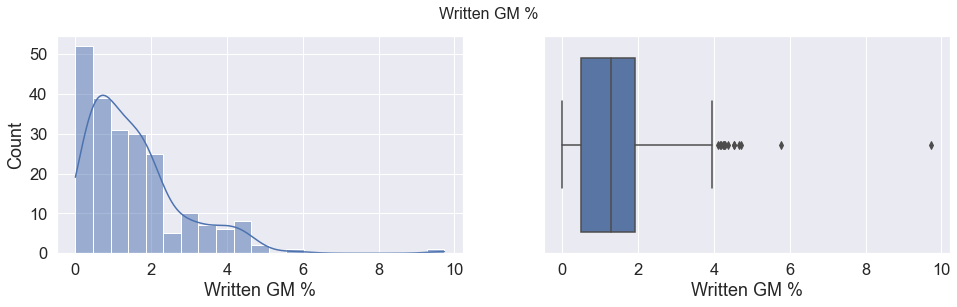

count    217.000000
mean       1.563968
std        1.291143
min        0.000000
25%        0.492000
50%        1.276000
75%        1.904000
max        9.732000
Name: Written GM %, dtype: float64


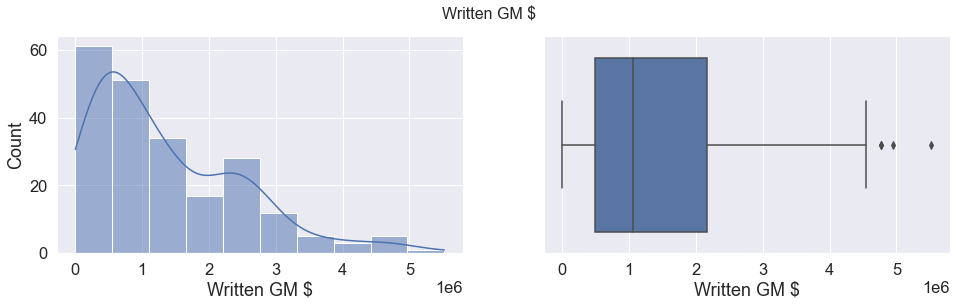

count    2.170000e+02
mean     1.367850e+06
std      1.136087e+06
min      0.000000e+00
25%      4.872190e+05
50%      1.053718e+06
75%      2.163600e+06
max      5.521582e+06
Name: Written GM $, dtype: float64


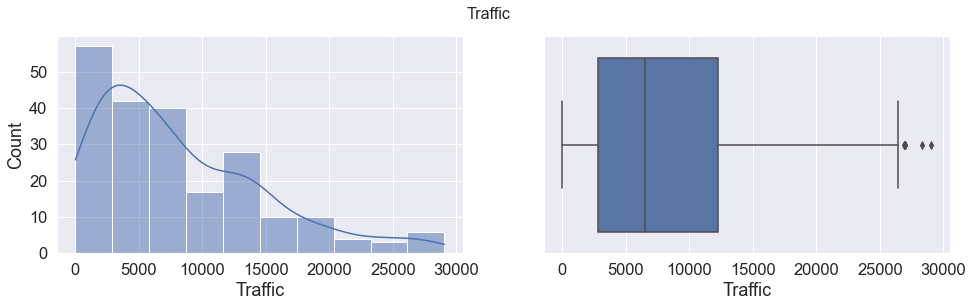

count      217.000000
mean      8173.419355
std       6619.123071
min          0.000000
25%       2813.000000
50%       6537.000000
75%      12274.000000
max      29055.000000
Name: Traffic, dtype: float64


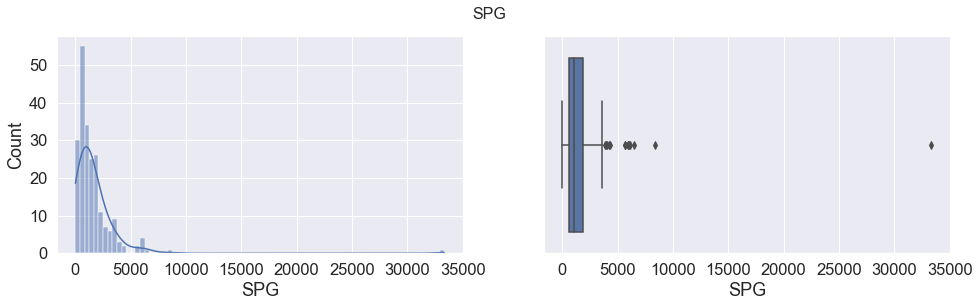

count      217.000000
mean      1656.755760
std       2542.476048
min          0.000000
25%        578.000000
50%       1065.000000
75%       1843.000000
max      33345.000000
Name: SPG, dtype: float64


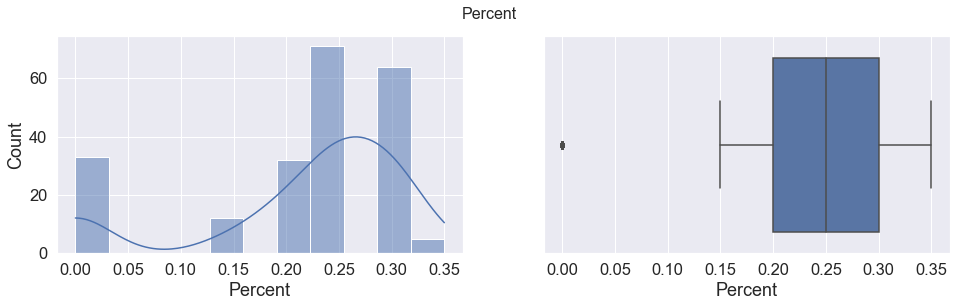

count    217.000000
mean       0.216129
std        0.101460
min        0.000000
25%        0.200000
50%        0.250000
75%        0.300000
max        0.350000
Name: Percent, dtype: float64


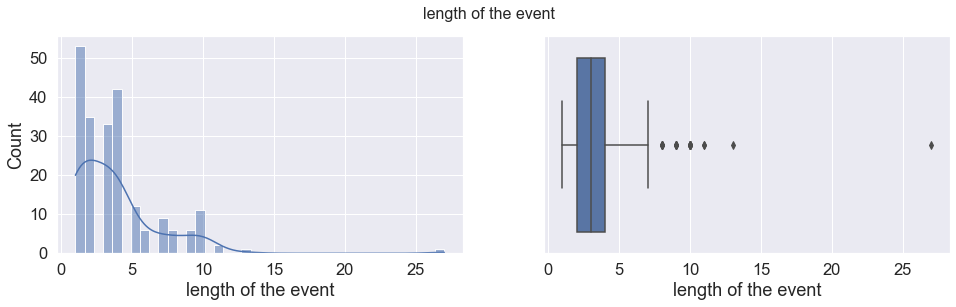

count    217.000000
mean       3.792627
std        3.123735
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max       27.000000
Name: length of the event, dtype: float64


In [44]:
for col in numeric_var.columns:
    if col not in ['Start Date', 'End Date']:
        report(col)

What does REAC, CPM BOS, GMFF etc mean? Are they useful for our analysis?
Traffic numbers are problematic, negative values?

### Correlation Analysis

What is the amount of correlation between the given features and target value?

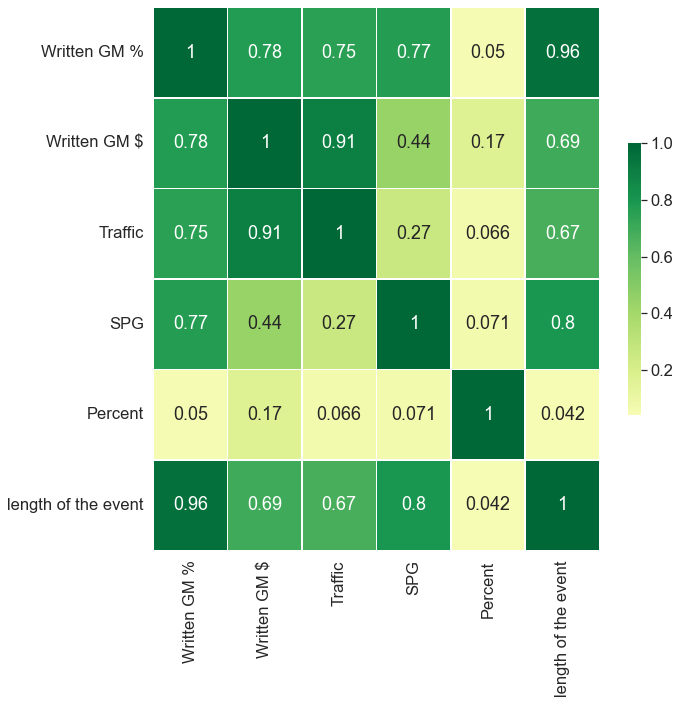

In [45]:
plt.figure(figsize = (10,10))
corr = numeric_var.corr()
sns.heatmap (corr, cmap= 'RdYlGn', center=0, annot=True, linewidths=.5, cbar_kws={"shrink": .5});

In [46]:
numeric_var.corr()

,Written GM %,Written GM $,Traffic,SPG,Percent,length of the event
Written GM %,1.000000,0.778892,0.753479,0.767161,0.049682,0.963270
Written GM $,0.778892,1.000000,0.905069,0.442878,0.171429,0.694331
Traffic,0.753479,0.905069,1.000000,0.266128,0.065907,0.671607
SPG,0.767161,0.442878,0.266128,1.000000,0.071323,0.801920
Percent,0.049682,0.171429,0.065907,0.071323,1.000000,0.042008
length of the event,0.963270,0.694331,0.671607,0.801920,0.042008,1.000000


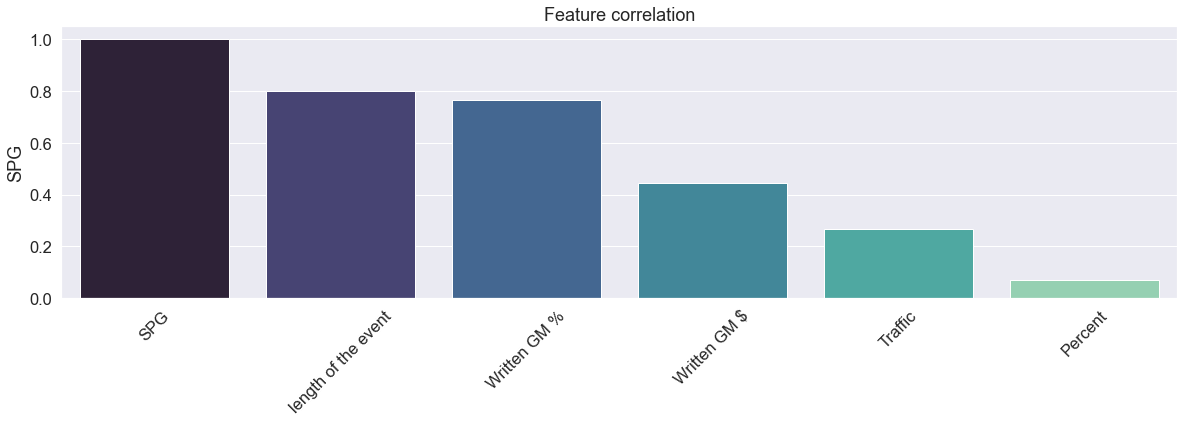

In [47]:
promo_corr = numeric_var.corr().iloc[3,:]
corr_df = pd.DataFrame(data = promo_corr, index = promo_corr.index ).sort_values (by = 'SPG', ascending = False)

plt.figure(figsize = (20,5))
sns.set_palette('mako')
plt.xticks(rotation = 45)
plt.title('Feature correlation')
sns.barplot (data = corr_df, x = corr_df.index, y = 'SPG');


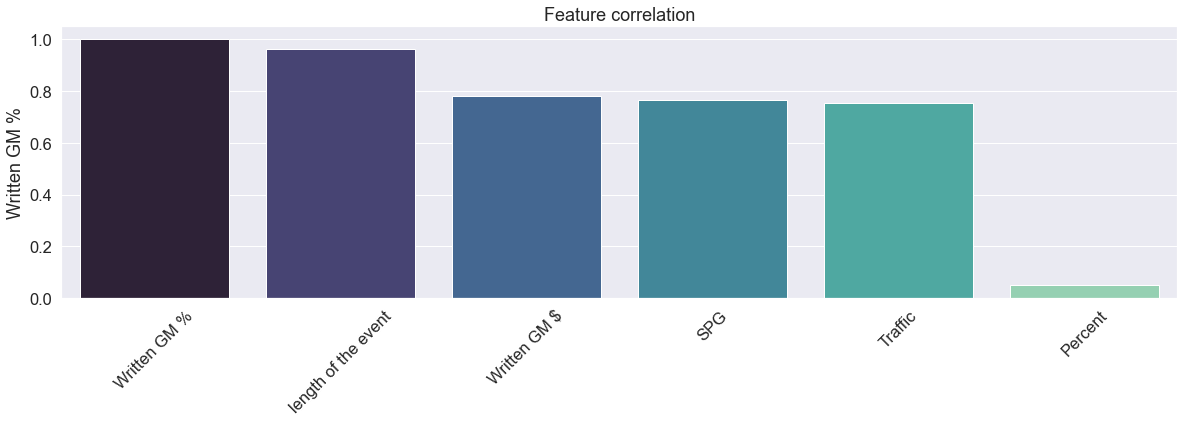

In [48]:
promo_corr = numeric_var.corr().iloc[0,:]
corr_df = pd.DataFrame(data = promo_corr, index = promo_corr.index ).sort_values (by = 'Written GM %', ascending = False)

plt.figure(figsize = (20,5))
sns.set_palette('mako')
plt.xticks(rotation = 45)
plt.title('Feature correlation')
sns.barplot (data = corr_df, x = corr_df.index, y = 'Written GM %');

In [97]:
df = data[["Start Date","End Date","Event", "Layer", "Type", "Written GM %", "Written GM $", "Traffic", "SPG", "Percent","length of the event"]]
df

,Start Date,End Date,Event,Layer,Type,Written GM %,Written GM $,Traffic,SPG,Percent,length of the event
0,2019-03-01,2019-03-03,Anniversary Sale,BMSM 15%/20% for $1499 or more/25% for $2499 o...,BMSM- buy more save more,1.206,931654,9231,741,0.15,3
1,2019-03-04,2019-03-07,Anniversary Sale,0.15,%,1.554,707305,6437,1130,0.15,4
2,2019-03-08,2019-03-10,Anniversary Sale,40% off 1 items /20% off the rest of your purc...,First Item,1.304,1411531,10074,1013,0.00,3
3,2019-03-11,2019-03-14,Anniversary Sale,0.2,%,1.513,732201,7844,982,0.20,4
4,2019-03-15,2019-03-15,Anniversary Sale,0.25,%,0.422,530576,2653,474,0.25,1
...,...,...,...,...,...,...,...,...,...,...,...
212,2021-12-07,2021-12-09,Home for the Holidays\n* I&P w smaller items (...,25% + I&P,%,1.251,621602,5040,892,0.25,3
213,2021-12-10,2021-12-14,Home for the Holidays\n* I&P w smaller items (...,30% + I&P,%,1.402,1254014,8470,925,0.30,5
214,2021-12-15,2021-12-23,Boxing Week Preview,25% + I&P,%,0.000,0,0,0,0.25,9
215,2021-12-24,2021-12-27,Boxing Day,30% + I&P,%,0.000,0,0,0,0.30,4


## Date Features

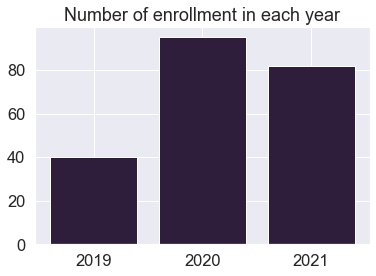

In [98]:
df['Start Date'].groupby(df['Start Date'].dt.year).agg('count')
# data['Start Date'].groupby(data['Start Date'].dt.month).agg('count')

plt.bar(height = df['Start Date'].dt.year.value_counts()[[2019,2020,2021]], x=['2019','2020','2021'])
plt.title('Number of enrollment in each year')
plt.show() 

In [99]:
df["Start Date"].max(), df["Start Date"].min()

(Timestamp('2021-12-28 00:00:00'), Timestamp('2019-03-01 00:00:00'))

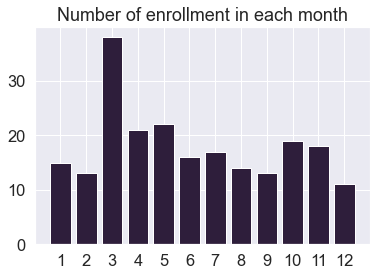

In [100]:
plt.bar(height = df['Start Date'].dt.month.value_counts()[[1,2,3,4,5,6,7,8,9,10,11,12]], x=['1','2','3','4','5','6','7','8','9','10','11','12'])
plt.title('Number of enrollment in each month')
plt.show()

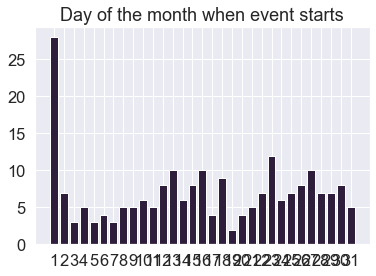

In [101]:
plt.bar(height = df['Start Date'].dt.day.value_counts()[[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31]], x=['1','2','3','4','5','6','7','8', '9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29','30','31'])
plt.title('Day of the month when event starts')
plt.show()

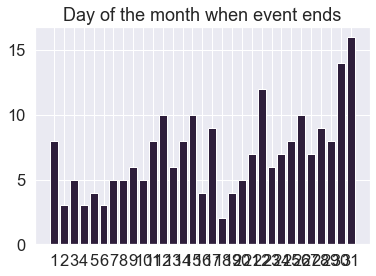

In [102]:
plt.bar(height = df['End Date'].dt.day.value_counts()[[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31]], x=['1','2','3','4','5','6','7','8', '9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29','30','31'])
plt.title('Day of the month when event ends')
plt.show()

We can use date components(day, month, year) as new features

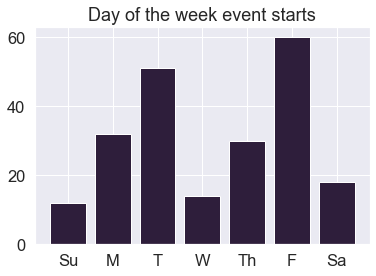

In [103]:
plt.bar(height = df['Start Date'].dt.day_name().value_counts()[['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']], x=['Su','M','T','W','Th','F','Sa'])
plt.title('Day of the week event starts')
plt.show()

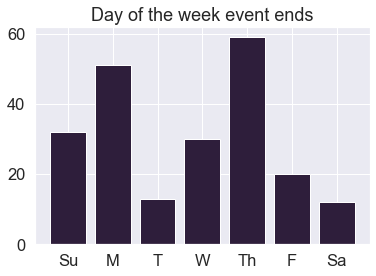

In [104]:
plt.bar(height = df['End Date'].dt.day_name().value_counts()[['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']], x=['Su','M','T','W','Th','F','Sa'])
plt.title('Day of the week event ends')
plt.show()

In [105]:
df['Day']= df['Start Date'].dt.day
df['Day_Name'] = df['Start Date'].dt.day_name()
df['Month']= df['Start Date'].dt.month
df['Year'] = df['Start Date'].dt.year

In [106]:
df.head()

,Start Date,End Date,Event,Layer,Type,Written GM %,Written GM $,Traffic,SPG,Percent,length of the event,Day,Day_Name,Month,Year
0,2019-03-01,2019-03-03,Anniversary Sale,BMSM 15%/20% for $1499 or more/25% for $2499 o...,BMSM- buy more save more,1.206,931654,9231,741,0.15,3,1,Friday,3,2019
1,2019-03-04,2019-03-07,Anniversary Sale,0.15,%,1.554,707305,6437,1130,0.15,4,4,Monday,3,2019
2,2019-03-08,2019-03-10,Anniversary Sale,40% off 1 items /20% off the rest of your purc...,First Item,1.304,1411531,10074,1013,0.00,3,8,Friday,3,2019
3,2019-03-11,2019-03-14,Anniversary Sale,0.2,%,1.513,732201,7844,982,0.20,4,11,Monday,3,2019
4,2019-03-15,2019-03-15,Anniversary Sale,0.25,%,0.422,530576,2653,474,0.25,1,15,Friday,3,2019


In [107]:
pd.DataFrame(df.isnull().sum(), columns=['#Null values']).T

,Start Date,End Date,Event,Layer,Type,Written GM %,Written GM $,Traffic,SPG,Percent,length of the event,Day,Day_Name,Month,Year
#Null values,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Feature Selection

We need to figure out which features to drop

### Remove Collinear Variables

In [109]:
# Threshold for removing correlated variables
threshold = 0.9

# Absolute value correlation matrix
corr_matrix = df.corr().abs()

# Upper triangle of correlations
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper.head()

,Written GM %,Written GM $,Traffic,SPG,Percent,length of the event,Day,Month,Year
Written GM %,NaN,0.778892,0.753479,0.767161,0.049682,0.963270,0.352557,0.049107,0.259790
Written GM $,NaN,NaN,0.905069,0.442878,0.171429,0.694331,0.223811,0.262963,0.393714
Traffic,NaN,NaN,NaN,0.266128,0.065907,0.671607,0.270145,0.239020,0.228179
SPG,NaN,NaN,NaN,NaN,0.071323,0.801920,0.220395,0.046073,0.165284
Percent,NaN,NaN,NaN,NaN,NaN,0.042008,0.046787,0.346040,0.453903


In [110]:
# Select columns with correlations above threshold
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

print('There are %d columns to remove.' % (len(to_drop)))

There are 2 columns to remove.


In [111]:
to_drop

['Traffic', 'length of the event']

## Feature Selection through Feature Importances

https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/

### Principal Component Analysis

In [119]:
numeric_var.columns

Index(['Written GM %', 'Written GM $', 'Traffic', 'SPG', 'Percent',
       'length of the event'],
      dtype='object')

In [150]:
from sklearn.preprocessing import StandardScaler
features = numeric_var.columns
# Separating out the features
x = df.loc[:, features].values
# Separating out the target
y = df.loc[:,['Type']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [152]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [153]:
finalDf = pd.concat([principalDf, df[['Type']]], axis = 1)
finalDf

,principal component 1,principal component 2,Type
0,-0.540957,0.496725,BMSM- buy more save more
1,-0.461374,0.722557,%
2,-0.311037,1.774682,First Item
3,-0.369300,0.214676,%
4,-1.707688,-0.361073,%
...,...,...,...
212,-0.829764,-0.227896,%
213,0.039953,-0.766216,%
214,-1.085301,0.120349,%
215,-1.825948,-0.579656,%


fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = df["Type"].values
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Type'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [157]:
pca.explained_variance_ratio_

array([0.64384702, 0.16994185])

In [168]:
df.head()

,Start Date,End Date,Event,Layer,Type,Written GM %,Written GM $,Traffic,SPG,Percent,length of the event,Day,Day_Name,Month,Year
0,2019-03-01,2019-03-03,Anniversary Sale,BMSM 15%/20% for $1499 or more/25% for $2499 o...,BMSM- buy more save more,1.206,931654,9231,741,0.15,3,1,Friday,3,2019
1,2019-03-04,2019-03-07,Anniversary Sale,0.15,%,1.554,707305,6437,1130,0.15,4,4,Monday,3,2019
2,2019-03-08,2019-03-10,Anniversary Sale,40% off 1 items /20% off the rest of your purc...,First Item,1.304,1411531,10074,1013,0.00,3,8,Friday,3,2019
3,2019-03-11,2019-03-14,Anniversary Sale,0.2,%,1.513,732201,7844,982,0.20,4,11,Monday,3,2019
4,2019-03-15,2019-03-15,Anniversary Sale,0.25,%,0.422,530576,2653,474,0.25,1,15,Friday,3,2019


Three benefits of performing feature selection before modeling your data are:

Reduces Overfitting: Less redundant data means less opportunity to make decisions based on noise.
Improves Accuracy: Less misleading data means modeling accuracy improves.
Reduces Training Time: Less data means that algorithms train faster.

### Univariate Selection

Statistical tests can be used to select those features that have the strongest relationship with the output variable.

In [174]:
# Feature Selection with Univariate Statistical Tests

from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

array = df.values
X = array[:,5:11]
Y = array[:,4] #Type
# feature extraction
test = SelectKBest(score_func=f_classif, k=4)
fit = test.fit(X, Y)
# summarize scores
set_printoptions(precision=3)
print(fit.scores_)
features = fit.transform(X)
# summarize selected features
print(features[0:5,:])

#Written GM % # Written GM $ #Traffic #SPG #Percent #length of the event

[ 0.706  0.371  0.409  0.246 17.525  0.786]
[[1.206 9231 0.15 3]
 [1.5539999999999998 6437 0.15 4]
 [1.304 10074 0.0 3]
 [1.513 7844 0.2 4]
 [0.422 2653 0.25 1]]


### Recursive Feature Elimination

recursively removing attributes and building a model on those attributes that remain.
It uses the model accuracy to identify which attributes (and combination of attributes) contribute the most to predicting the target attribute.

In [184]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
# load data
array = df.values
X = array[:,[5,6,7,8,11,13,14]]
Y = array[:,4]
# feature extraction
model = LogisticRegression(solver='lbfgs')
rfe = RFE(model, 3)
fit = rfe.fit(X, Y)
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

Num Features: 3
Selected Features: [False False  True  True False False  True]
Feature Ranking: [5 3 1 1 2 4 1]


In [ ]:
Start Date	End Date	Event	Layer	Type	Written GM %	Written GM $	Traffic	SPG	Percent	length of the event	Day	Day_Name	Month	Year

In [ ]:
For a specific event, find the SPG and GM per day (SPG or GM / length of the event)

Does the campaign performance vary in different seasons? Then we need to focus specific campaigns sepreately!

In [ ]:
Does the time components and the length of the event affect the result?